In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid', rc= {'xtick.bottom': True, 'axes.edgecolor': 'black'})
sns.axes_style('darkgrid')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [3]:
sns.set_context('notebook')

In [4]:
df = pd.read_csv('CSVs/Combined_CSV.csv')
df = df.set_index('Year')
df.head()

,DCSP,TEMP_CHG,ANN_PRCP,FREQ_EXT_EVE,AG_TFP_IND,GDP,POP_GRW,C_Yld,RFWC,CH4_EMSN
Year,,,,,,,,,,
1990,2201.0454,-0.098,1431.0149,14,68.606299,368.749759,2.199,1.8912,1661.2056,70.82
1991,2290.3003,0.179,1134.9230,11,68.649885,303.850438,2.137,1.9263,1626.6532,70.42
1992,2323.1700,0.017,1000.0663,8,70.082351,317.558735,2.123,2.0248,1593.2584,70.16
1993,2256.1570,0.211,1174.9967,12,70.409601,301.500786,2.077,2.0849,1560.9629,70.61
1994,2275.4902,0.100,1275.7301,6,71.166750,346.227393,2.012,2.1155,1529.7347,70.31


In [5]:
stats = df.describe()
display(stats)

,DCSP,TEMP_CHG,ANN_PRCP,FREQ_EXT_EVE,AG_TFP_IND,GDP,POP_GRW,C_Yld,RFWC,CH4_EMSN
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2353.246919,0.522710,1193.020750,14.806452,84.270157,944.063158,1.610258,2.546423,1287.531161,66.364194
std,100.529921,0.337167,104.233225,5.688698,15.514211,604.967535,0.373743,0.433439,189.047953,2.756517
min,2201.045400,-0.098000,999.936040,5.000000,67.624872,301.500786,0.948000,1.891200,1035.529400,62.330000
25%,2283.198750,0.311000,1112.815850,11.000000,71.468298,413.704020,1.333000,2.207950,1127.260700,63.755000
50%,2340.933000,0.529000,1186.058800,14.000000,78.263838,710.509345,1.568000,2.423100,1252.339800,66.020000
75%,2412.500000,0.697000,1255.922950,18.000000,97.750213,1443.830148,1.936000,2.912100,1429.143550,68.710000
max,2550.000000,1.176000,1431.014900,31.000000,115.053906,2050.163790,2.199000,3.416100,1661.205600,70.820000


In [6]:
def describe_data(df:pd.DataFrame):
    stats = df.describe()
    fig = plt.figure(figsize=(10, 4*(len(df.columns))+1))
    full_grid = fig.add_gridspec(len(df.columns), 1)
    counter = 0

    for x in df.columns.values:
        with sns.axes_style():
            ax = fig.add_subplot(full_grid[counter,0])
            ax.axvline(x=stats.loc['mean', x], color= '.3', dashes= (2,2), label='Mean')
            sns.boxplot(data=df, x=df[x], orient= 'h', fill=True, width=.5, ax=ax)
            plt.table(cellText=stats[x].to_frame().values.round(2),
                        rowLabels=stats[x].to_frame().index,
                        colLabels=stats[x].to_frame().columns,
                        bbox=(-0.3, 0.2, 0.2, 0.6))
            ax.set_title(x, fontsize= 16, loc= 'left')
        counter += 1
    
    fig.tight_layout()


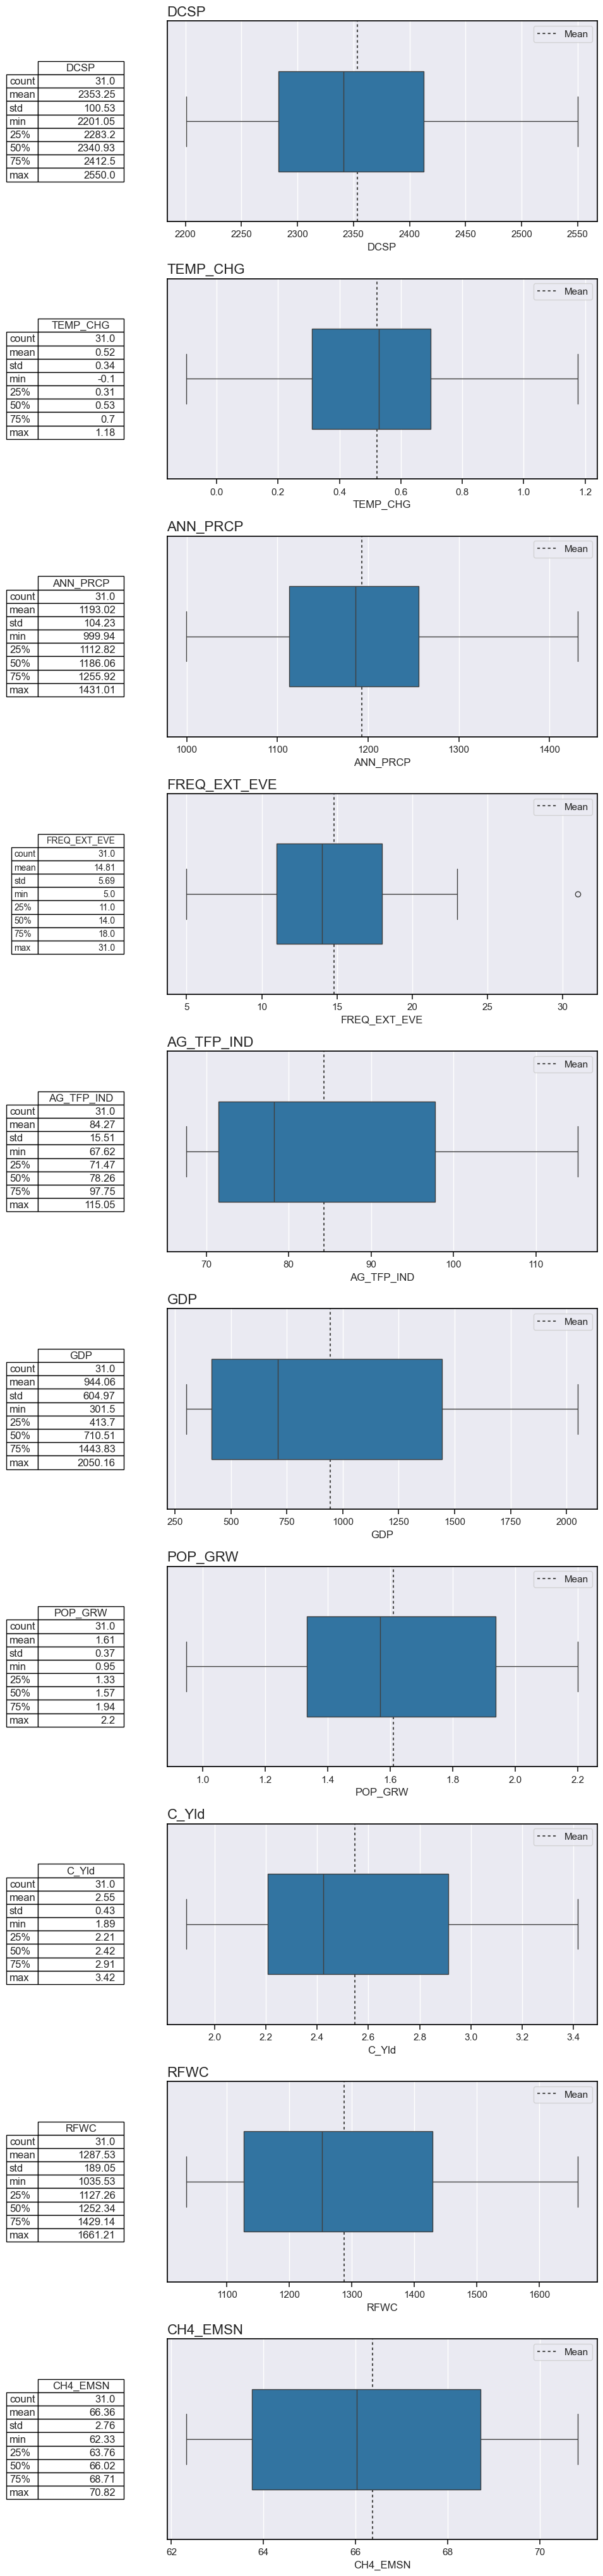

In [7]:
describe_data(df)

In [8]:
def var_vs_time(df:pd.DataFrame):
    fig = plt.figure( figsize=( 5.28 *2, 3.84*(len(df.columns)/2) ) )
    full_grid = fig.add_gridspec(len(df.columns)//2, 2)
    x_axis = 'Year'
    row_no = 0
    col_no = 0
    thingy = False

    for col_name in df.columns.values:
        y_axis = f'{col_name}'
        ax = fig.add_subplot(full_grid[row_no, col_no])
        sns.scatterplot(data= df, x=x_axis, y=y_axis, ax=ax)
        plt.title(label=f'{col_name} vs {x_axis}', loc='left', fontsize=13.2)
        thingy = not thingy
        if thingy:
            col_no = 1
        else:
            row_no +=1
            col_no = 0
            
    fig.tight_layout()

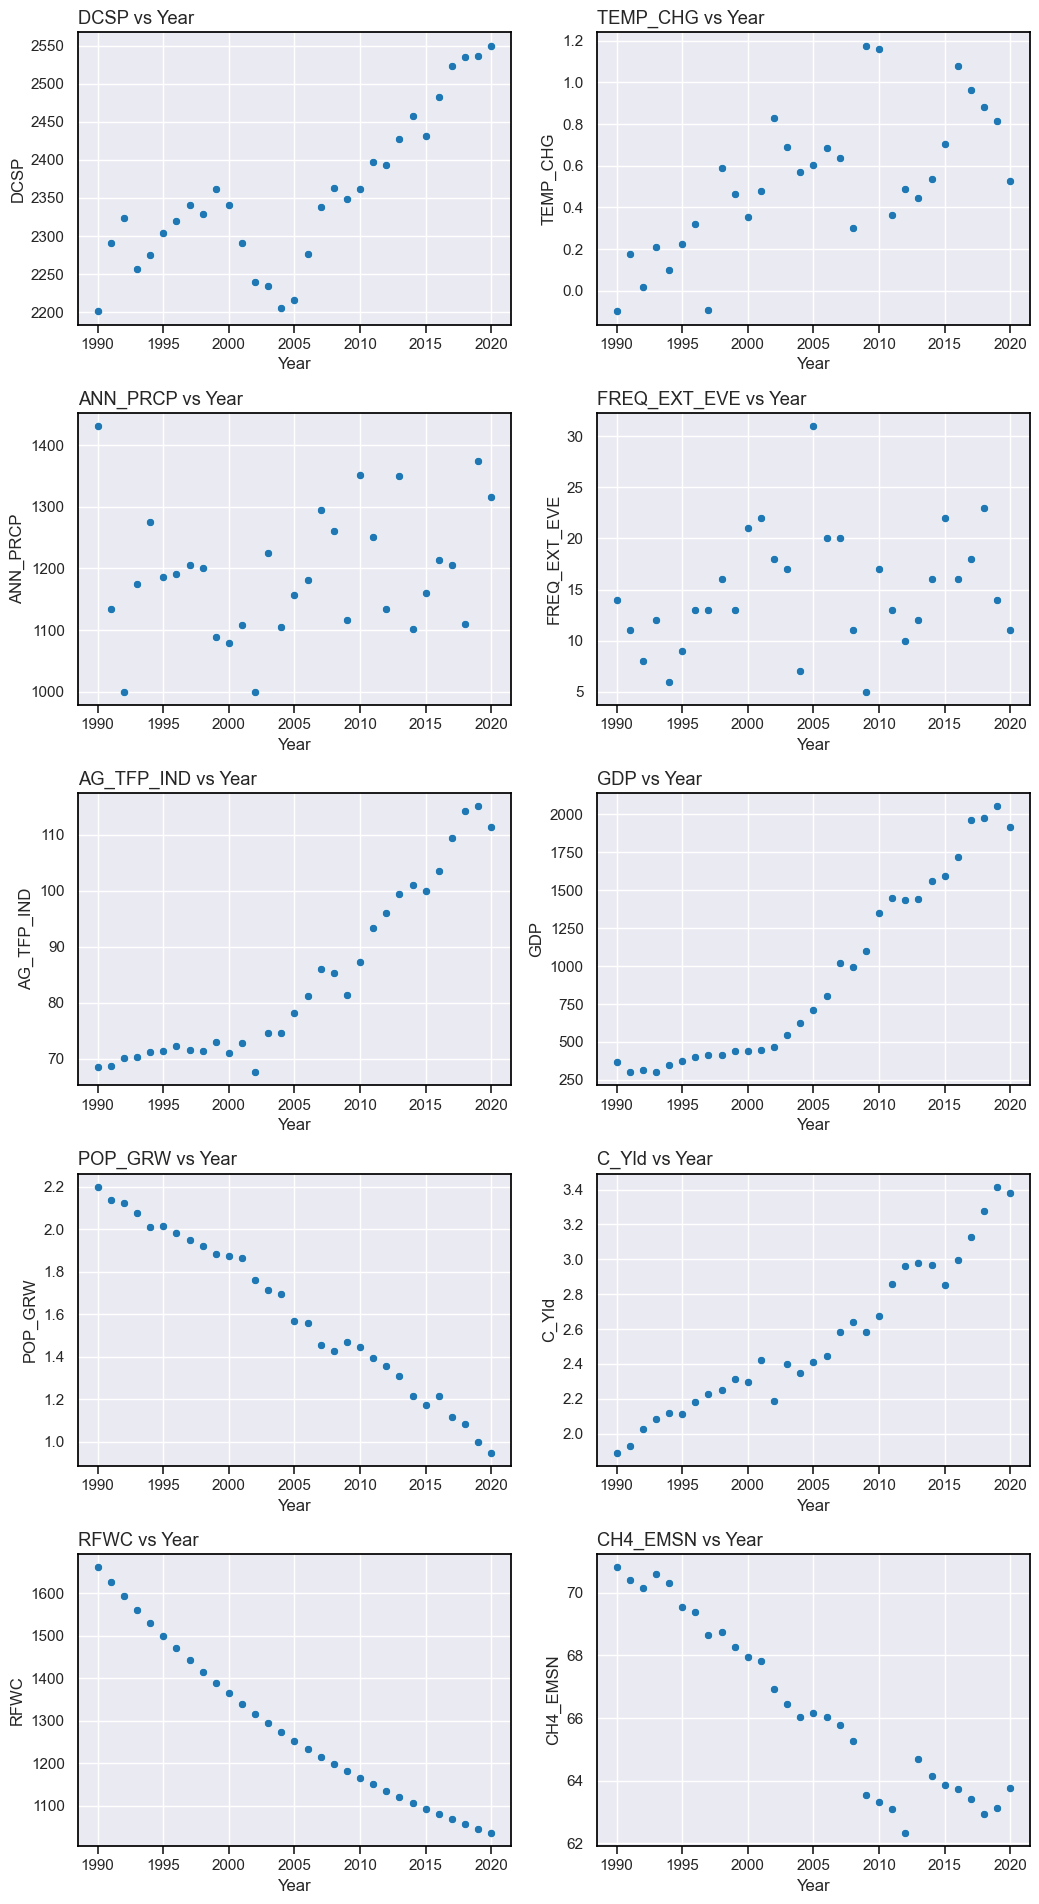

In [9]:
var_vs_time(df)

### Practices/Rough Attempts/Trials

C:\Users\srika\AppData\Local\Temp\ipykernel_10976\139505431.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  full_grid.show()


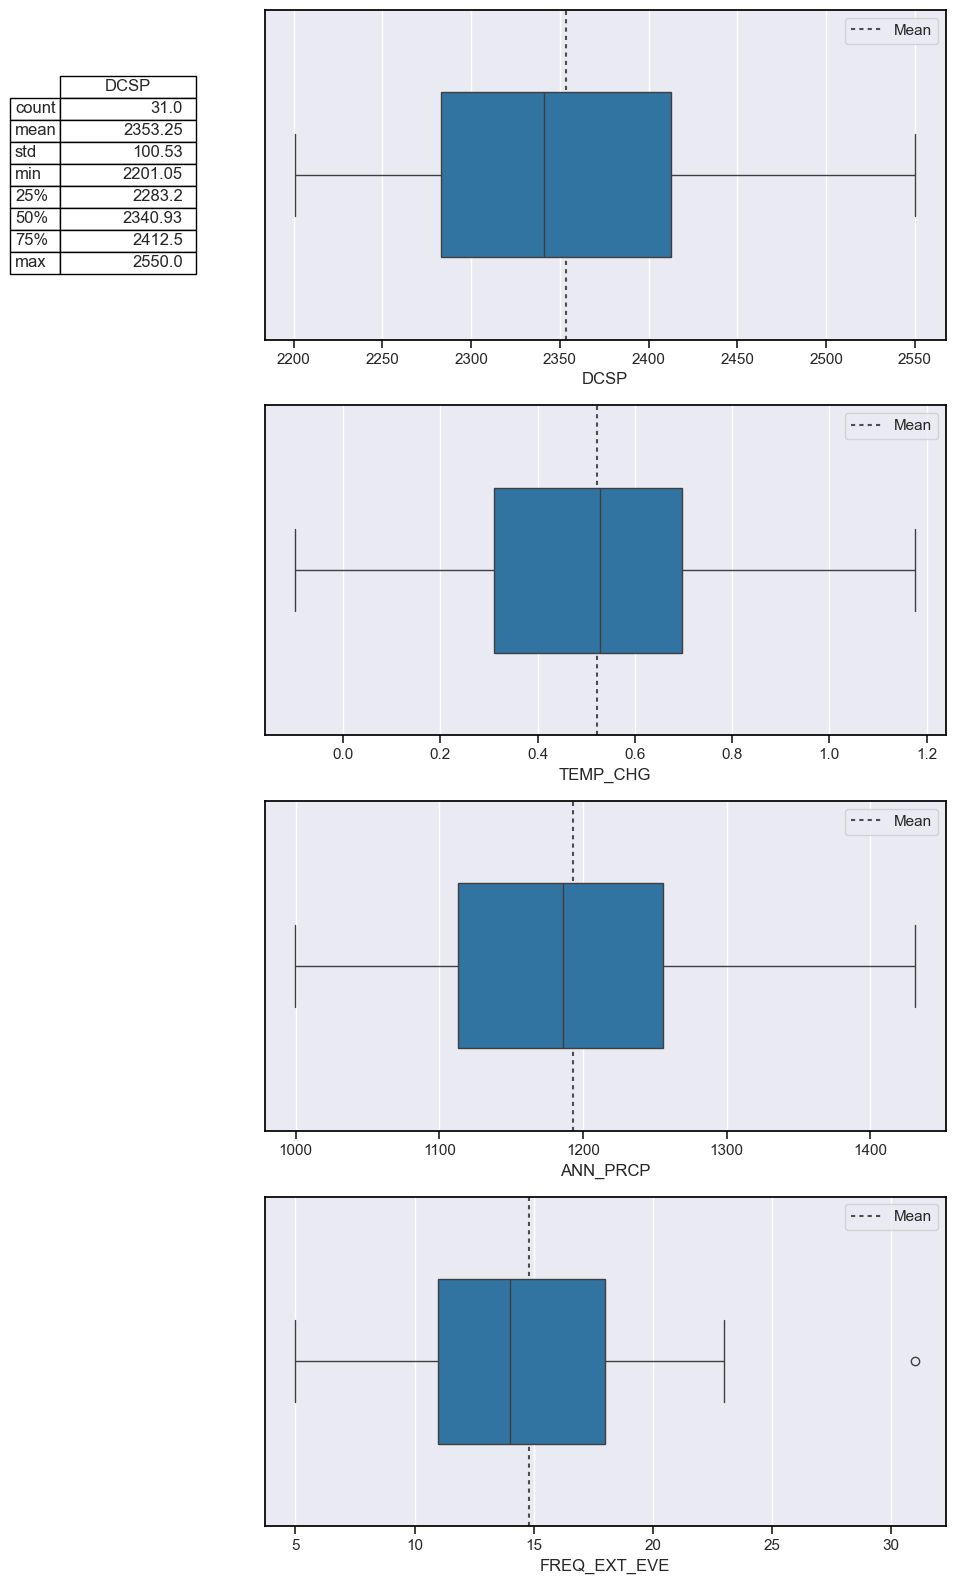

In [10]:
#Trial for buiding describe_data function

full_grid = plt.figure(figsize=(10, 16))
gs = full_grid.add_gridspec(4, 1)

with sns.axes_style():
    ax = full_grid.add_subplot(gs[0,0])
    ax.axvline(x=stats.loc['mean', 'DCSP'], color= '.3', dashes= (2,2), label='Mean')
    sns.boxplot(data=df, x=df['DCSP'], orient= 'h', fill=True, width=.5, ax=ax)
    plt.table(cellText=stats['DCSP'].to_frame().values.round(2),
                  rowLabels=stats['DCSP'].to_frame().index,
                  colLabels=stats['DCSP'].to_frame().columns,
                  bbox=(-0.3, 0.2, 0.2, 0.6))

with sns.axes_style():
    ax = full_grid.add_subplot(gs[1,0])
    ax.axvline(x=stats.loc['mean', 'TEMP_CHG'], color= '.3', dashes= (2,2), label='Mean')
    sns.boxplot(data=df, x=df['TEMP_CHG'], orient= 'h', fill=True, width=.5, ax=ax)

with sns.axes_style():
    ax = full_grid.add_subplot(gs[2,0])
    ax.axvline(x=stats.loc['mean', 'ANN_PRCP'], color= '.3', dashes= (2,2), label='Mean')
    sns.boxplot(data=df, x=df['ANN_PRCP'], orient= 'h', fill=True, width=.5, ax=ax)

with sns.axes_style():
    ax = full_grid.add_subplot(gs[3,0])
    ax.axvline(x=stats.loc['mean', 'FREQ_EXT_EVE'], color= '.3', dashes= (2,2), label='Mean')
    sns.boxplot(data=df, x=df['FREQ_EXT_EVE'], orient= 'h', fill=True, width=.5, ax=ax)

full_grid.tight_layout()
full_grid.show()

6.4 4.8


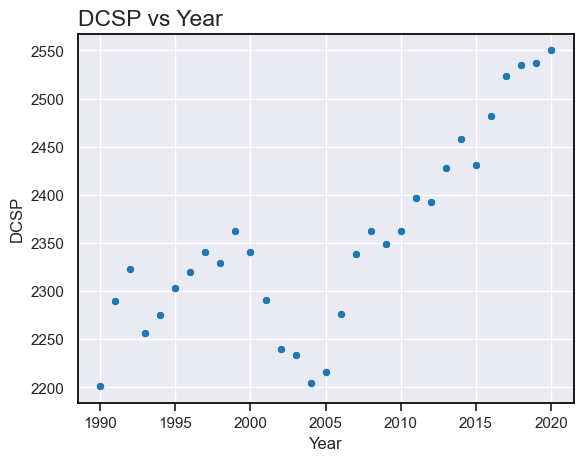

In [11]:
#Trial for buiding var_vs_time function

fig = sns.scatterplot(data=df, x='Year', y='DCSP')
plt.title(label='DCSP vs Year', loc='left', fontsize=16.5)

fig_2 = fig.get_figure()
width, height = fig_2.get_size_inches()
print(width, height)


In [12]:
print(type(fig), 
type(fig_2))

<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.figure.Figure'>
